In [3]:
from ase.cluster import Octahedron
from ase.io import read, write
import acat
from ase.optimize import BFGS
from asap3 import EMT
from mace.calculators import mace_mp
import numpy as np
from ase.visualize import view

In [4]:
mace_calc = mace_mp(model="/work/g15farris/2023-12-03-mace-128-L1_epoch-199.model", default_dtype='float64')

Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/home/g15farris/.conda/envs/farris/lib/python3.9/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/home/g15farris/.conda/envs/farris/lib/python3.9/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/home/g15farris/.conda/envs/farris/lib/python3.9/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/home/g15farris/.conda/envs/farris/lib/python3.9/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


In [8]:
mace_diff = -1315.342739  - -1313.376536

dft_diff = -1311.749 - -1310.065

mace_diff, dft_diff

(-1.9662029999999504, -1.683999999999969)

In [ ]:
(-1.9664310000000569, -1.683999999999969)

In [5]:
atoms = read('./xyz/Ag300Pd105_L10.xyz') #-1310.065
atoms.calc = mace_calc
BFGS(atoms).run(fmax=0.03)


      Step     Time          Energy         fmax
BFGS:    0 10:45:11    -1312.278072        0.3331
BFGS:    1 10:45:12    -1312.414895        0.2963
BFGS:    2 10:45:13    -1313.012936        0.1485
BFGS:    3 10:45:14    -1313.041841        0.0950
BFGS:    4 10:45:15    -1313.077622        0.0827
BFGS:    5 10:45:16    -1313.174067        0.0620
BFGS:    6 10:45:17    -1313.231868        0.0744
BFGS:    7 10:45:18    -1313.262077        0.1049
BFGS:    8 10:45:19    -1313.275900        0.1138
BFGS:    9 10:45:21    -1313.295478        0.1105
BFGS:   10 10:45:21    -1313.322736        0.0882
BFGS:   11 10:45:22    -1313.345728        0.0777
BFGS:   12 10:45:23    -1313.356086        0.0547
BFGS:   13 10:45:24    -1313.360998        0.0510
BFGS:   14 10:45:25    -1313.366174        0.0406
BFGS:   15 10:45:26    -1313.372388        0.0316
BFGS:   16 10:45:28    -1313.376536        0.0288


True

In [6]:
atoms = read('./xyz/Ag300Pd105_LEH.xyz')#-1311.749
atoms.calc = mace_calc
BFGS(atoms).run(fmax=0.03)

      Step     Time          Energy         fmax
BFGS:    0 10:45:28    -1313.949175        0.3594
BFGS:    1 10:45:29    -1314.136702        0.3198
BFGS:    2 10:45:30    -1314.948851        0.1690
BFGS:    3 10:45:31    -1314.988073        0.1013
BFGS:    4 10:45:32    -1315.020065        0.0961
BFGS:    5 10:45:33    -1315.143878        0.0716
BFGS:    6 10:45:34    -1315.193674        0.0807
BFGS:    7 10:45:35    -1315.218738        0.0986
BFGS:    8 10:45:36    -1315.232392        0.0938
BFGS:    9 10:45:37    -1315.257789        0.0795
BFGS:   10 10:45:38    -1315.286447        0.0770
BFGS:   11 10:45:39    -1315.306926        0.0677
BFGS:   12 10:45:40    -1315.315688        0.0607
BFGS:   13 10:45:41    -1315.321816        0.0560
BFGS:   14 10:45:42    -1315.329914        0.0457
BFGS:   15 10:45:43    -1315.338180        0.0320
BFGS:   16 10:45:44    -1315.342739        0.0277


True

In [2]:
atoms = Octahedron('Ag', 9,3)
atoms.center(5)
#atoms.calc = mace_mp(model="/work/g15farris/2023-12-03-mace-128-L1_epoch-199.model", dtype=float64)
atoms.calc = EMT()
opt = BFGS(atoms)
opt.run(fmax=0.03, steps=50)
atoms.calc = None

      Step     Time          Energy         fmax
BFGS:    0 12:00:08       71.405059        0.6054
BFGS:    1 12:00:08       71.046656        0.5662
BFGS:    2 12:00:08       69.274591        0.4247
BFGS:    3 12:00:08       69.132000        0.2756
BFGS:    4 12:00:09       69.033023        0.2294
BFGS:    5 12:00:09       68.413697        0.1814
BFGS:    6 12:00:09       68.247734        0.2303


KeyboardInterrupt: 

In [ ]:
from Core.Nanoparticle import Nanoparticle
import copy 

nano = Nanoparticle()
nano.add_atoms(atoms)
gen_cns = nano.get_generalized_coordination_numbers([[x] for x in range(405)])

results = []
for gcn, indices in gen_cns.items():
    atoms_pd = copy.deepcopy(atoms)
    atoms_pd[indices[0][0]].symbol = 'Pd'
    atoms_pd.calc = EMT()
    #atoms_pd.calc = mace_mp(model="/work/g15farris/2023-12-03-mace-128-L1_epoch-199.model")
    opt = BFGS(atoms_pd)
    opt.run(fmax=0.03, steps=50)
    print(gcn, nano.get_coordination_number(indices[0][0]), atoms_pd.get_potential_energy()) 
    results.append((gcn, nano.get_coordination_number(indices[0][0]), atoms_pd.get_potential_energy(), atoms_pd))

Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
      Step     Time          Energy         fmax
BFGS:    0 10:21:58    -1055.544067        0.5681
BFGS:    1 10:21:59    -1055.552979        0.5243
BFGS:    2 10:22:00    -1055.593140        0.3484
BFGS:    3 10:22:01    -1055.595215        0.2544
BFGS:    4 10:22:02    -1055.598633        0.1765
BFGS:    5 10:22:03    -1055.606689        0.1515
BFGS:    6 10:22:05    -1055.611084        0.1260
BFGS:    7 10:22:07    -1055.612549        0.0969
BFGS:    8 10:22:08    -1055.613892        0.0844
BFGS:    9 10:22:09    -1055.615723        0.0692
BFGS:   10 10:22:11    -1055.617554        0.0627
BFGS:   11 10:22:12    -1055.618652        0.0514
BFGS:   12 10:22:13    -1055.619385        0.0350
BFGS:   13 10:22:14    -1055.619507        0.0344
BFGS:   14 10:22:16    -1055.620361

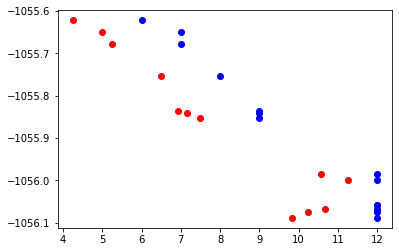

In [ ]:
import matplotlib.pyplot as plt
from ase.io import write, read

for res in results:
    gcn, cn, ene, atoms = res
    #write(f'xyz/Ag404Pd1_gnc_{gcn}_cn_{cn}_E_{ene:1.3f}.xyz', atoms)
    plt.scatter(gcn, ene, color='red')
    plt.scatter(cn, ene, color='blue')

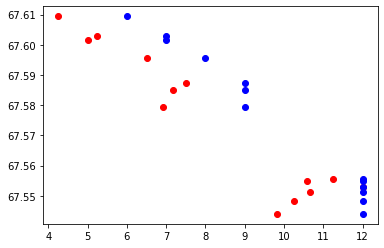

In [35]:
import matplotlib.pyplot as plt
from ase.io import write, read

for res in results:
    gcn, cn, ene, atoms = res
    #write(f'xyz/Ag404Pd1_gnc_{gcn}_cn_{cn}_E_{ene:1.3f}.xyz', atoms)
    plt.scatter(gcn, ene, color='red')
    plt.scatter(cn, ene, color='blue')
    

In [17]:
from ase.visualize import view
import glob

traj = []
for x in glob.glob('xyz/*'):
    print(x)
    traj.append(read(x))

view(traj[-2], viewer='ngl')

xyz/Ag404Pd1_gnc_4.25_cn_6_E_-0.311.xyz
xyz/Ag404Pd1_gnc_5.25_cn_7_E_-0.320.xyz
xyz/Ag404Pd1_gnc_6.5_cn_8_E_-0.380.xyz
xyz/Ag404Pd1_gnc_6.92_cn_9_E_-0.324.xyz
xyz/Ag404Pd1_gnc_7.5_cn_9_E_-0.320.xyz
xyz/Ag404Pd1_gnc_5.0_cn_7_E_-0.317.xyz
xyz/Ag404Pd1_gnc_10.58_cn_12_E_-0.308.xyz
xyz/Ag404Pd1_gnc_7.17_cn_9_E_-0.328.xyz
xyz/Ag404Pd1_gnc_10.25_cn_12_E_-0.323.xyz
xyz/Ag404Pd1_gnc_11.25_cn_12_E_-0.302.xyz
xyz/Ag404Pd1_gnc_9.83_cn_12_E_-0.321.xyz
xyz/Ag404Pd1_gnc_12.0_cn_12_E_-0.308.xyz
xyz/Ag404Pd1_gnc_10.67_cn_12_E_-0.327.xyz
